This notebook is to have timing tests for different functions of the package based on the timeit magic in notebooks.

In [154]:
# Import packages
import re
import ocel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import normalize
import ocel_features.algorithm as algo
import ocel_features.util.object_descendants as od
import ocel_features.util.object_graph as og
import ocel_features.variants.object_based as ob


# Constants
LOG_FOLDER='../logs/'
# Import logs
minimal = ocel.import_log(f'{LOG_FOLDER}actual-min.jsonocel')

# please download these logs from http://ocel-standard.org/ ie. from your log folder:
# small: wget http://ocel-standard.org/1.0/running-example.jsonocel.zip && unzip running-example.jsonocel.zip && rm running-example.jsonocel.zip
# medium: wget http://ocel-standard.org/1.0/p2p.jsonocel.zip && unzip p2p.jsonocel.zip && rm p2p.jsonocel.zip
# large: wget http://ocel-standard.org/1.0/o2c.jsonocel.zip && unzip o2c.jsonocel.zip && rm o2c.jsonocel.zip

small = ocel.import_log(f'{LOG_FOLDER}running-example.jsonocel')  # 22367 events, 11522 objects
medium = ocel.import_log(f'{LOG_FOLDER}p2p.jsonocel')  # 24854 events, 74489 objects -> includes multiple representations of same object
large = ocel.import_log(f'{LOG_FOLDER}o2c.jsonocel')  # 98350 events, 107767 objects

logs = [minimal, small, medium, large]

# Select the target log for the notebook
TARGET_LOG = large
# Define Features to check (None = all)
FEATURE_LIST = None# ['neighbour_count']

**Generate all features from target log**

In [155]:
# Apply the algorithm on all object types and all features
df, row_ids = algo.apply(TARGET_LOG, feature_list=FEATURE_LIST)

# drop OHE columns
df = df.loc[:, [x for x in df.columns if ':activity:' not in x]]

# Define a dictionary to show which indexes belong to which object type
object_types = TARGET_LOG['ocel:global-log']['ocel:object-types']

obj_type_index = {o_t: [] for o_t in object_types}
for i, obj in enumerate(row_ids):
    o_t = TARGET_LOG['ocel:objects'][obj]['ocel:type']
    obj_type_index[o_t].append(i)
    

**For each feature, show the 1D distribution with mean and std. dev.**

(1 / 19) 1D Distribution based on Object-Type BELNR (33362 objects)
neighbour_count:           mean=0.508, std.dev=0.872, min=0, max=19
lifetime:                  mean=449.952, std.dev=46253.803, min=0.0, max=7864536.0
single_type_ratio:         mean=1.0, std.dev=0.009, min=0.0, max=1.0
avg_obj_event_interaction: mean=0.507, std.dev=0.871, min=0.0, max=19.0


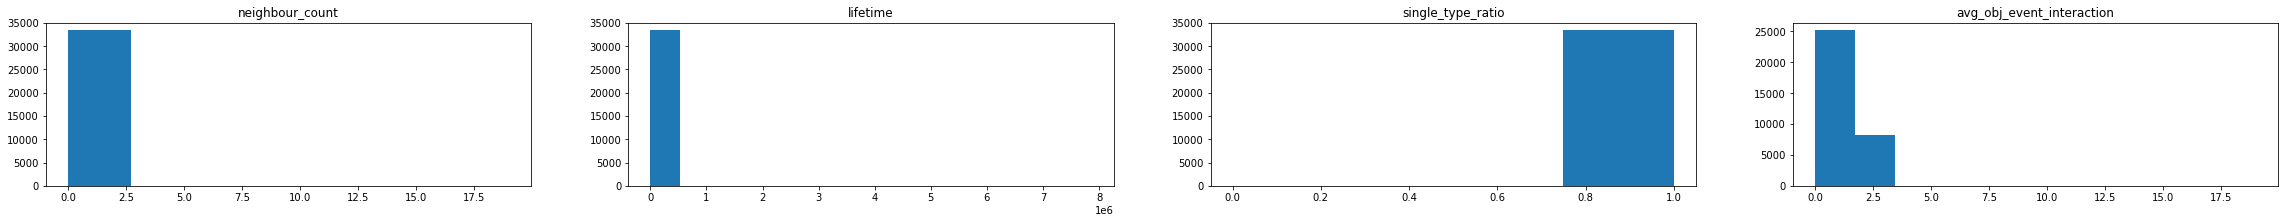

(2 / 19) 1D Distribution based on Object-Type CHARGE (14734 objects)
neighbour_count:           mean=1.642, std.dev=1.002, min=0, max=45
lifetime:                  mean=0.0, std.dev=0.0, min=0.0, max=0.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.642, std.dev=1.002, min=0.0, max=45.0


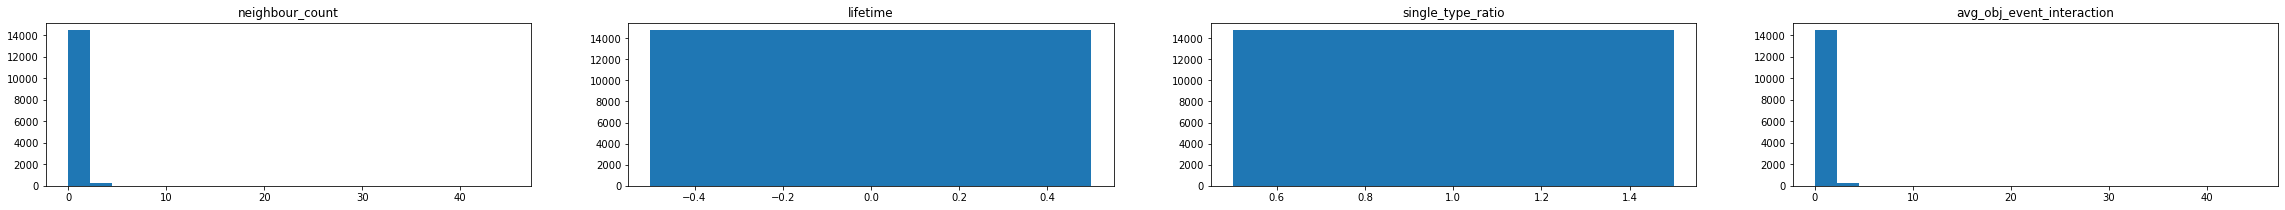

(3 / 19) 1D Distribution based on Object-Type CREDIT_MEMO_DOC (11 objects)
neighbour_count:           mean=1.273, std.dev=0.467, min=1, max=2
lifetime:                  mean=0.0, std.dev=0.0, min=0.0, max=0.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.273, std.dev=0.467, min=1.0, max=2.0


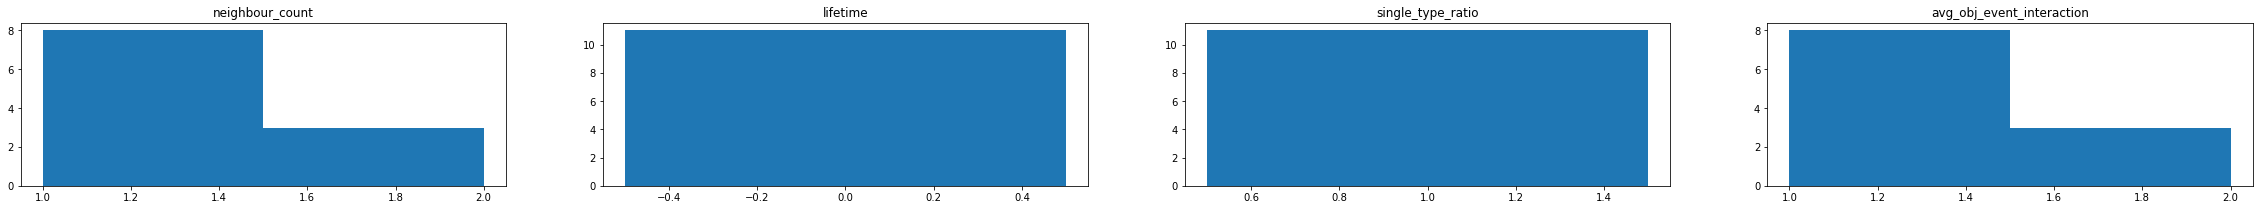

(4 / 19) 1D Distribution based on Object-Type CREDIT_MEMO_REQ (22 objects)
neighbour_count:           mean=2.955, std.dev=0.213, min=2, max=3
lifetime:                  mean=3.364, std.dev=15.777, min=0.0, max=74.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=2.909, std.dev=0.426, min=1.0, max=3.0


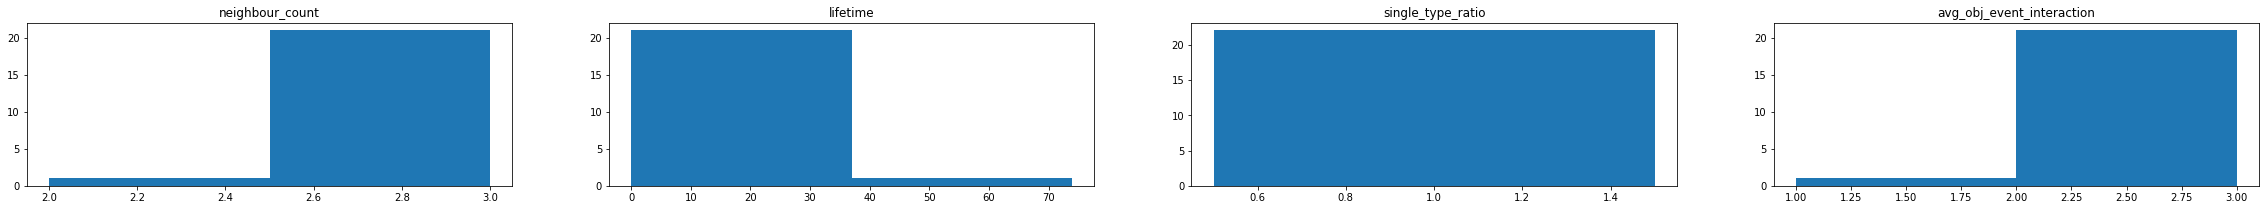

(5 / 19) 1D Distribution based on Object-Type DEBIT_MEMO_DOC (94 objects)
neighbour_count:           mean=1.596, std.dev=0.807, min=0, max=4
lifetime:                  mean=77755.511, std.dev=736816.085, min=0.0, max=7143567.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.58, std.dev=0.784, min=0.0, max=4.0


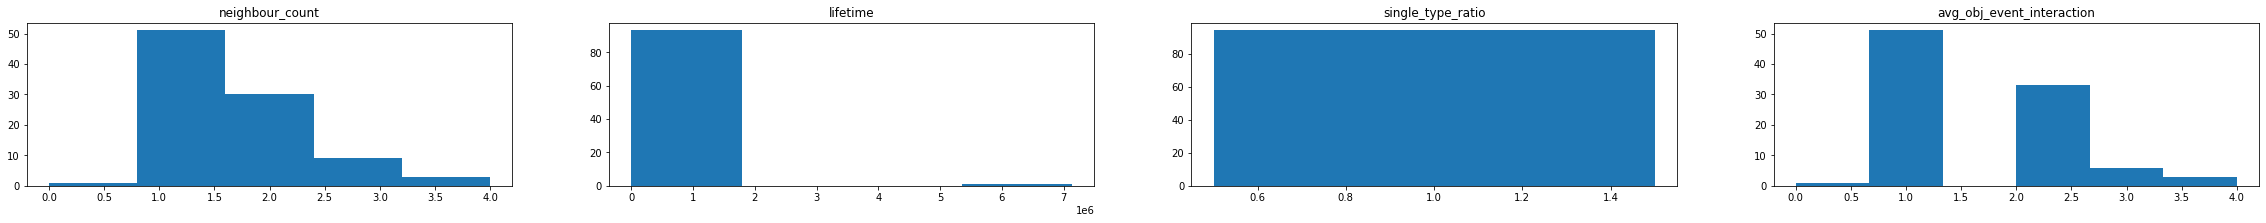

(6 / 19) 1D Distribution based on Object-Type DEBIT_MEMO_REQ (184 objects)
neighbour_count:           mean=3.092, std.dev=1.463, min=1, max=11
lifetime:                  mean=524462.342, std.dev=6121795.512, min=0.0, max=82791472.0
single_type_ratio:         mean=0.992, std.dev=0.063, min=0.5, max=1.0
avg_obj_event_interaction: mean=2.289, std.dev=1.024, min=1.0, max=6.0


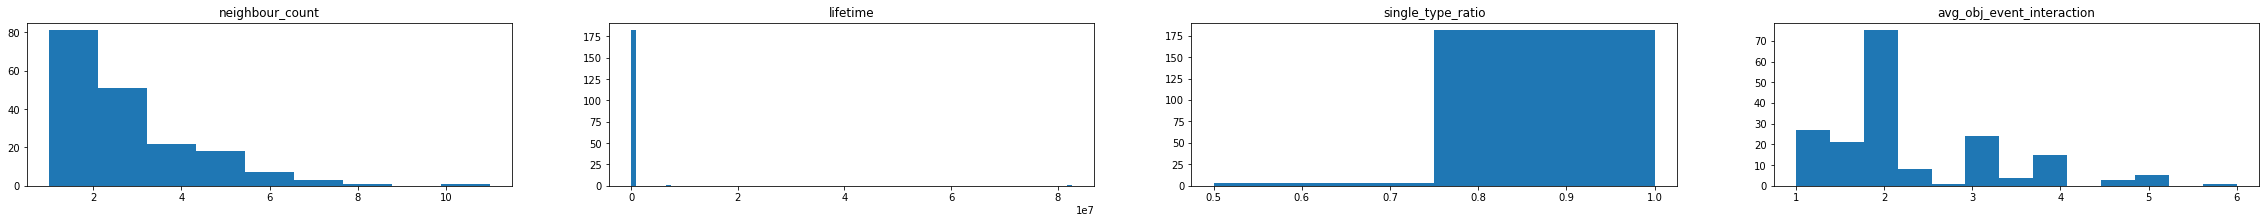

(7 / 19) 1D Distribution based on Object-Type EINKBELEG (26774 objects)
neighbour_count:           mean=1.472, std.dev=1.486, min=0, max=73
lifetime:                  mean=35513.259, std.dev=2838955.227, min=0.0, max=263779200.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.469, std.dev=1.483, min=0.0, max=73.0


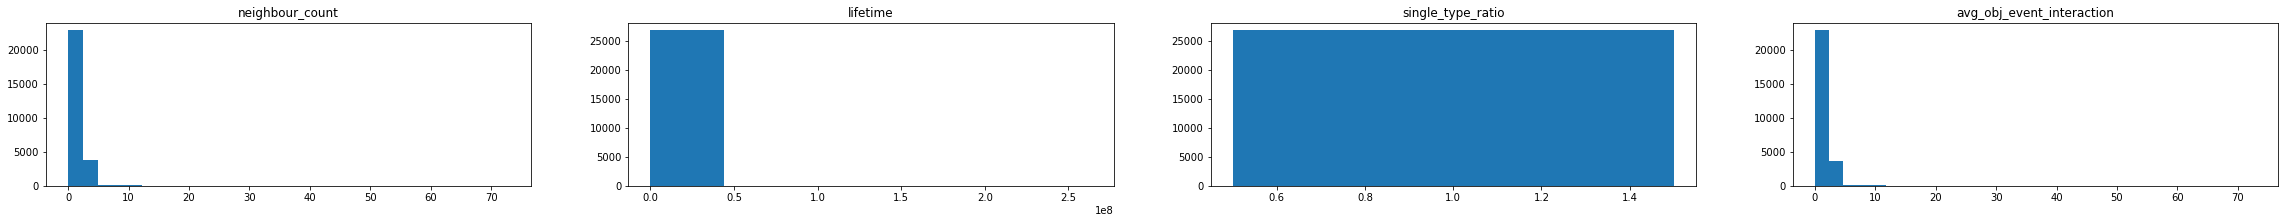

(8 / 19) 1D Distribution based on Object-Type HANDL_UNIT (14439 objects)
neighbour_count:           mean=22.266, std.dev=26.645, min=0, max=231
lifetime:                  mean=62830966.527, std.dev=113884032.046, min=0.0, max=661263232.0
single_type_ratio:         mean=0.687, std.dev=0.215, min=0.0, max=1.0
avg_obj_event_interaction: mean=10.31, std.dev=14.474, min=0.0, max=84.0


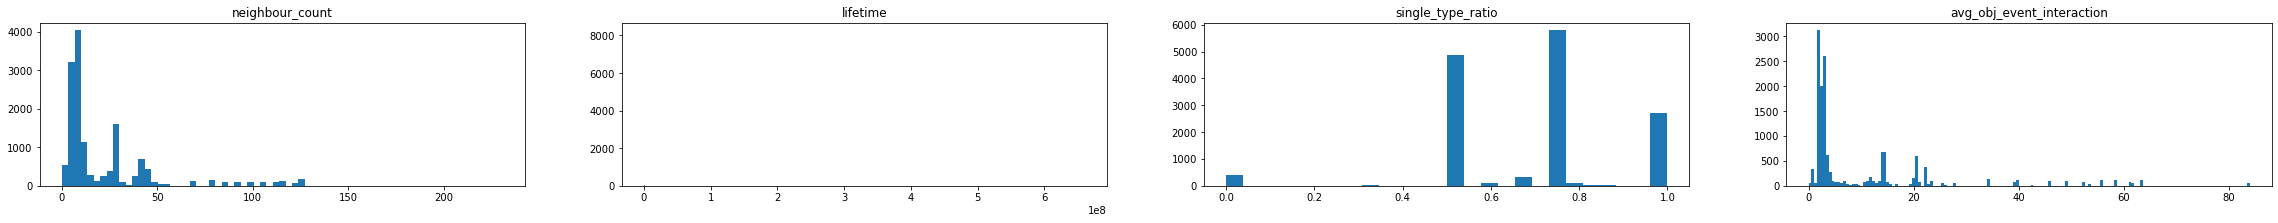

(9 / 19) 1D Distribution based on Object-Type INDIP_REQ (3 objects)
neighbour_count:           mean=2.333, std.dev=0.577, min=2, max=3
lifetime:                  mean=119736376.667, std.dev=205795002.251, min=521386.0, max=357367529.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.0, std.dev=0.0, min=1.0, max=1.0


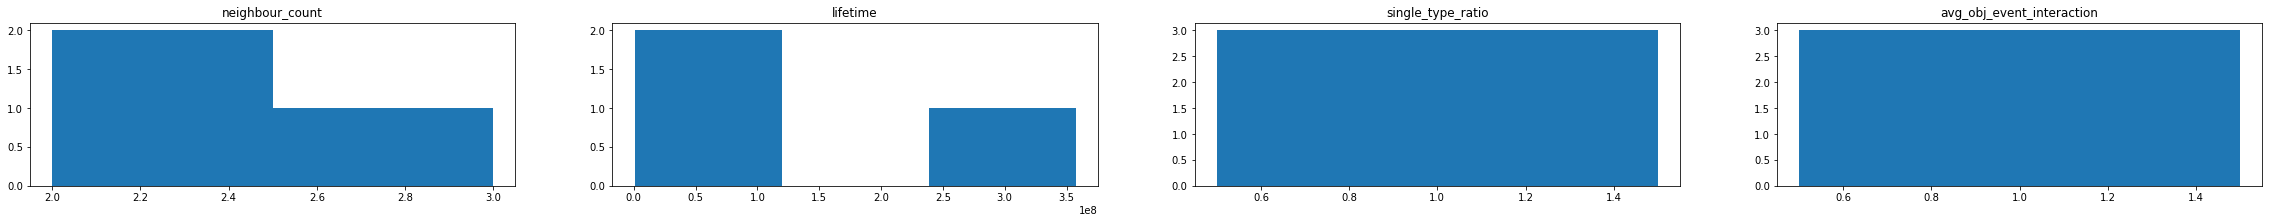

(10 / 19) 1D Distribution based on Object-Type INFOSATZ (6 objects)
neighbour_count:           mean=1.667, std.dev=0.516, min=1, max=2
lifetime:                  mean=48510.5, std.dev=38553.755, min=0.0, max=78964.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.0, std.dev=0.0, min=1.0, max=1.0


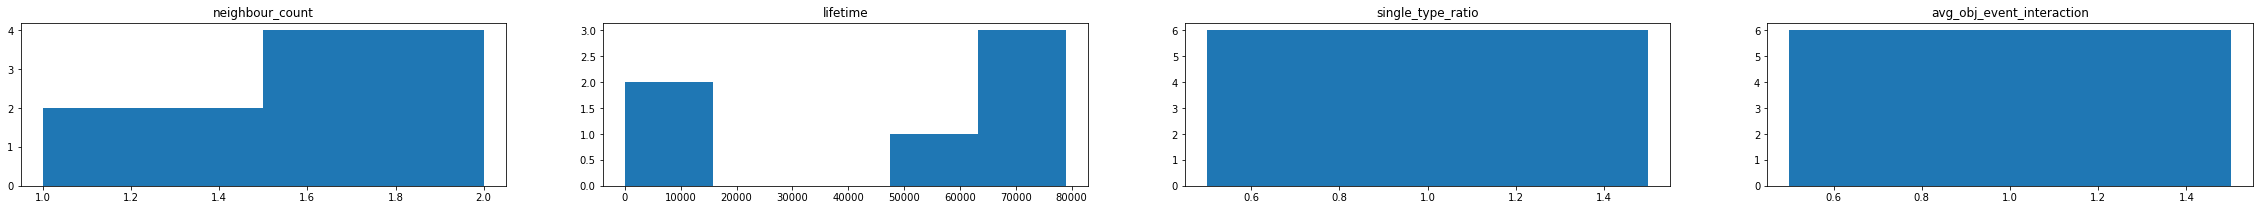

(11 / 19) 1D Distribution based on Object-Type INVOICE_CANCEL (43 objects)
neighbour_count:           mean=1.14, std.dev=1.125, min=0, max=3
lifetime:                  mean=0.0, std.dev=0.0, min=0.0, max=0.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.14, std.dev=1.125, min=0.0, max=3.0


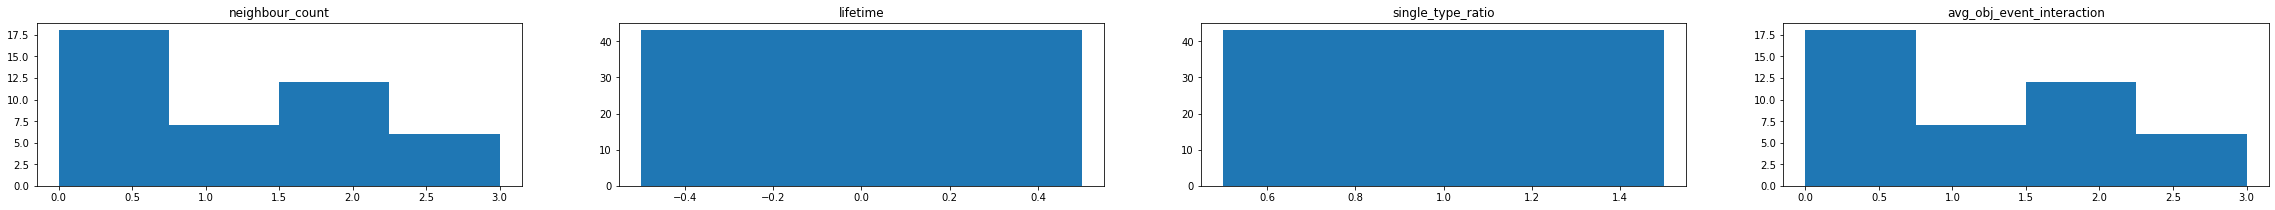

(12 / 19) 1D Distribution based on Object-Type INVOICE_PRO_FORMA (93 objects)
neighbour_count:           mean=1.989, std.dev=0.104, min=1, max=2
lifetime:                  mean=0.0, std.dev=0.0, min=0.0, max=0.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=1.989, std.dev=0.104, min=1.0, max=2.0


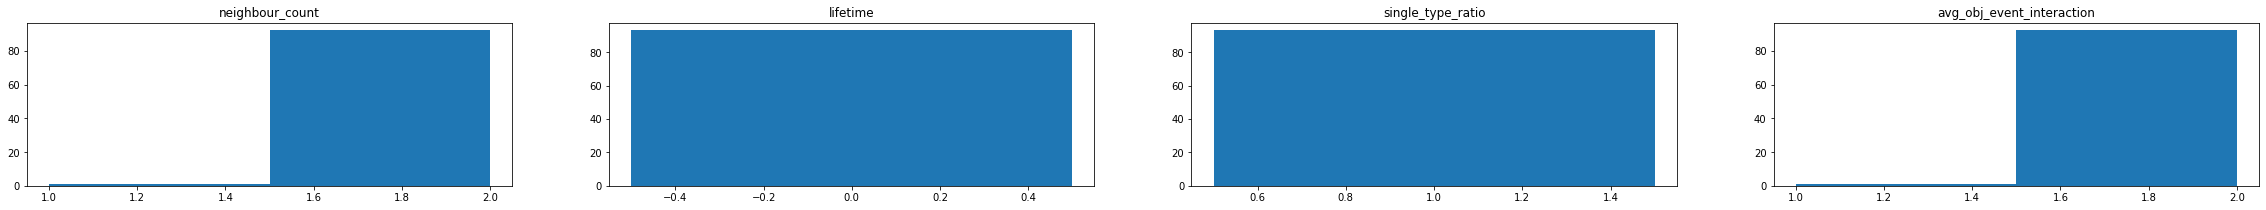

(13 / 19) 1D Distribution based on Object-Type ITEM_PROPOSAL (3 objects)
neighbour_count:           mean=0.667, std.dev=1.155, min=0, max=2
lifetime:                  mean=0.0, std.dev=0.0, min=0.0, max=0.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=0.667, std.dev=1.155, min=0.0, max=2.0


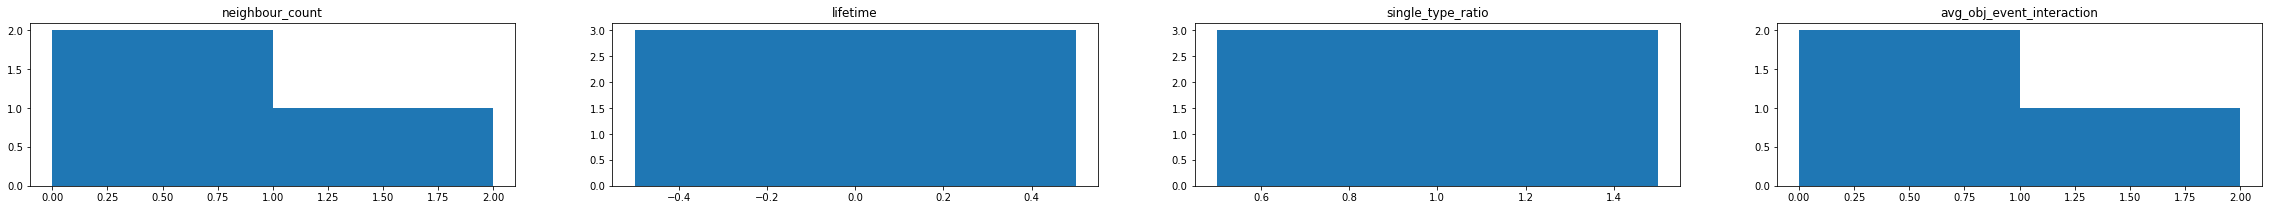

(14 / 19) 1D Distribution based on Object-Type MATERIAL (4198 objects)
neighbour_count:           mean=23.821, std.dev=91.593, min=1, max=1937
lifetime:                  mean=39932536.238, std.dev=124455312.194, min=0.0, max=771292800.0
single_type_ratio:         mean=0.66, std.dev=0.458, min=0.0, max=1.0
avg_obj_event_interaction: mean=5.856, std.dev=12.562, min=1.0, max=73.0


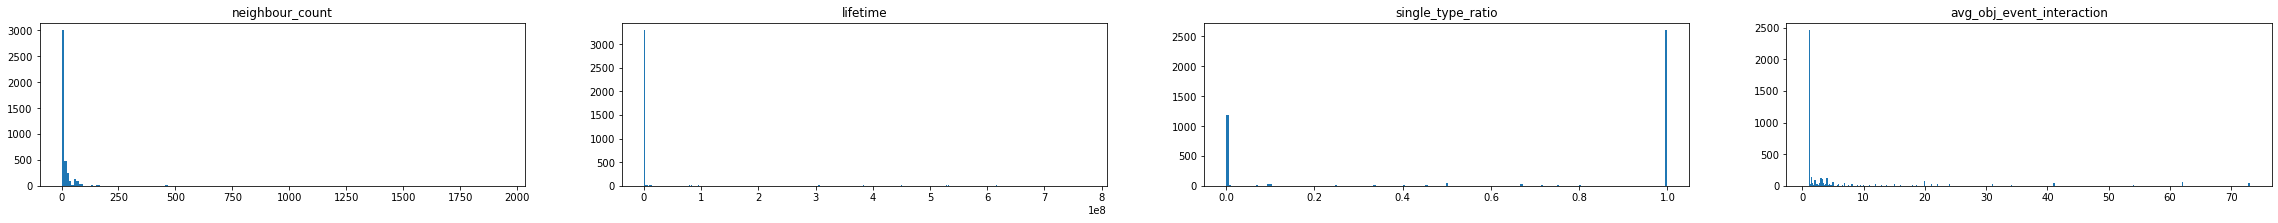

(15 / 19) 1D Distribution based on Object-Type ORD_WO_CHARGE (1 objects)
neighbour_count:           mean=4.0, std.dev=nan, min=4, max=4
lifetime:                  mean=231.0, std.dev=nan, min=231.0, max=231.0
single_type_ratio:         mean=1.0, std.dev=nan, min=1.0, max=1.0
avg_obj_event_interaction: mean=2.0, std.dev=nan, min=2.0, max=2.0


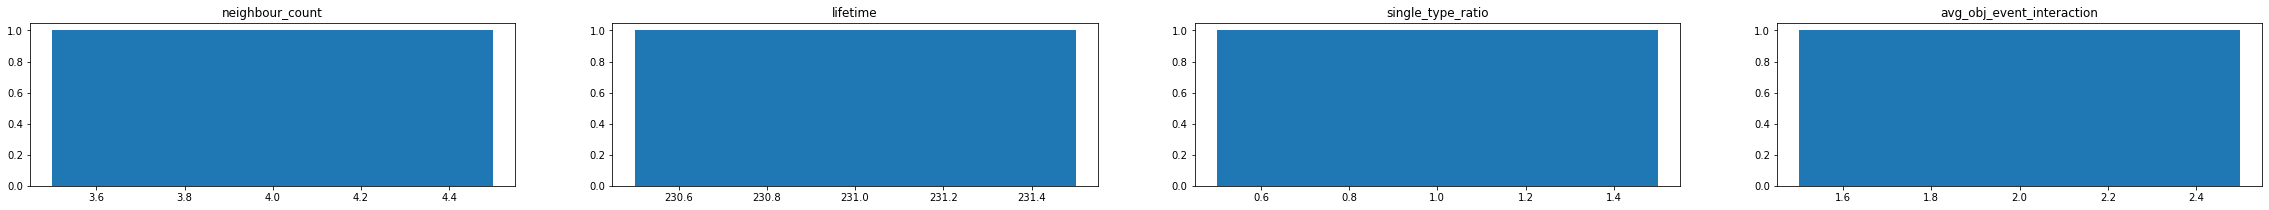

(16 / 19) 1D Distribution based on Object-Type RETURNS_DELIVERY (32 objects)
neighbour_count:           mean=3.25, std.dev=0.916, min=2, max=6
lifetime:                  mean=463661.5, std.dev=2577777.123, min=0.0, max=14588509.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=2.245, std.dev=0.399, min=2.0, max=3.0


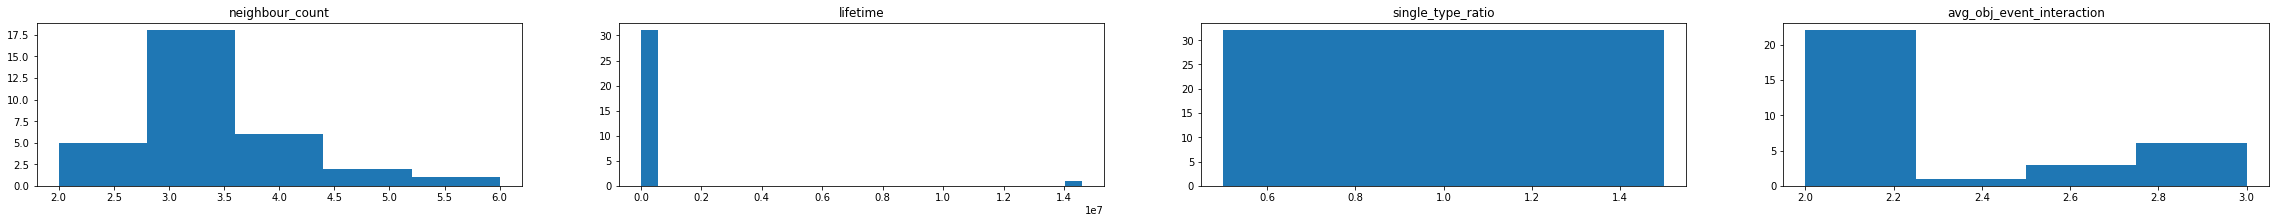

(17 / 19) 1D Distribution based on Object-Type RETURNS_DOC (32 objects)
neighbour_count:           mean=3.375, std.dev=1.008, min=2, max=5
lifetime:                  mean=456997.688, std.dev=2578719.717, min=0.0, max=14588571.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=2.023, std.dev=0.885, min=1.0, max=5.0


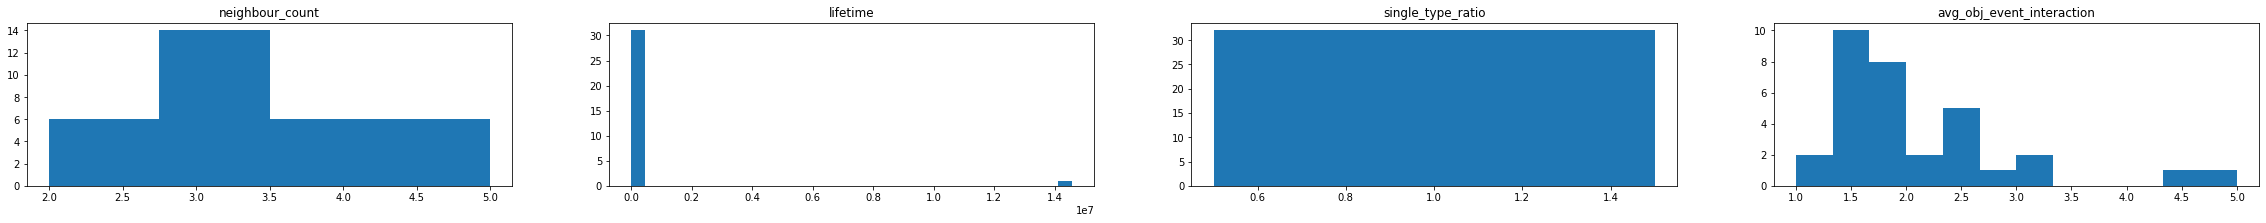

(18 / 19) 1D Distribution based on Object-Type VERKBELEG (9490 objects)
neighbour_count:           mean=5.203, std.dev=4.015, min=0, max=78
lifetime:                  mean=7874055.337, std.dev=55594131.049, min=0.0, max=718618477.0
single_type_ratio:         mean=0.945, std.dev=0.202, min=0.0, max=1.0
avg_obj_event_interaction: mean=2.283, std.dev=1.241, min=0.0, max=18.75


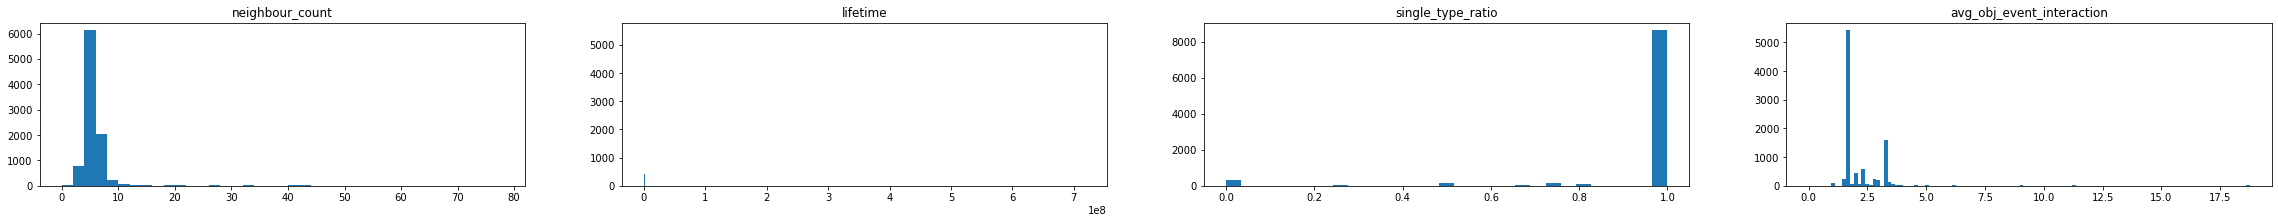

(19 / 19) 1D Distribution based on Object-Type WMS_TRANSFER (4246 objects)
neighbour_count:           mean=3.192, std.dev=7.207, min=0, max=126
lifetime:                  mean=0.0, std.dev=0.0, min=0.0, max=0.0
single_type_ratio:         mean=1.0, std.dev=0.0, min=1.0, max=1.0
avg_obj_event_interaction: mean=3.192, std.dev=7.207, min=0.0, max=126.0


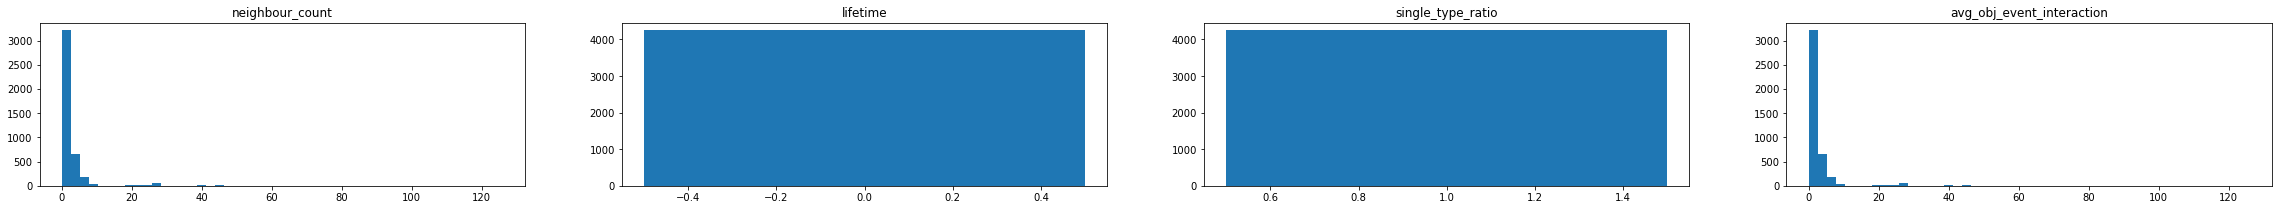

==========================================================DONE


In [156]:
# Prepare the descendant graphs
plt.rcParams['figure.figsize'] = (40,3)
for i, index in enumerate(obj_type_index):
    print('==========================================================')
    print(f'({i + 1} / {len(obj_type_index)}) 1D Distribution based on Object-Type {index} ({len(obj_type_index[index])} objects)')
    longest_feature_string = max([len(f) for f in df.columns])
    fig, axs = plt.subplots(1, len(df.columns))
    for j, feature in enumerate(df.columns):
        hist_x = df.iloc[obj_type_index[index], j].values
        if len(df.columns) > 1:
            axs[j].title.set_text(f'{feature[4:]}')
            axs[j].hist(hist_x, bins=len({x for x in hist_x}))
        else:
            axs.title.set_text(f'{feature[4:]}')
            axs.hist(hist_x, bins=len({x for x in hist_x}))
        s = pd.Series(data= hist_x)
        info_string = f'mean={round(s.mean(), 3)}, std.dev={round(s.std(), 3)}, min={round(s.min(), 3)}, max={round(s.max(), 3)}'
        print(f'{feature[4:]}: {" " * (longest_feature_string - len(feature))}{info_string}')
    plt.show()

print('==========================================================DONE')

**Compare Feature Distributions among object types (object types with 0 variance in a feature will be skipped)**
- x axis limited to 2 std. dev

Comparing the distributions of the features between object types


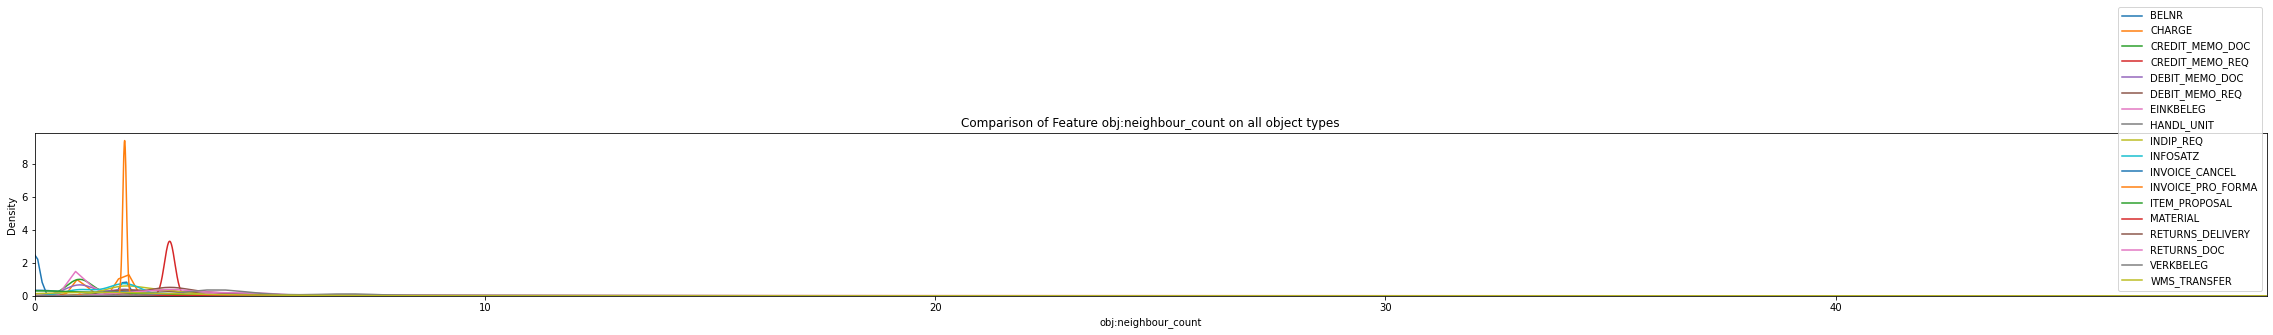

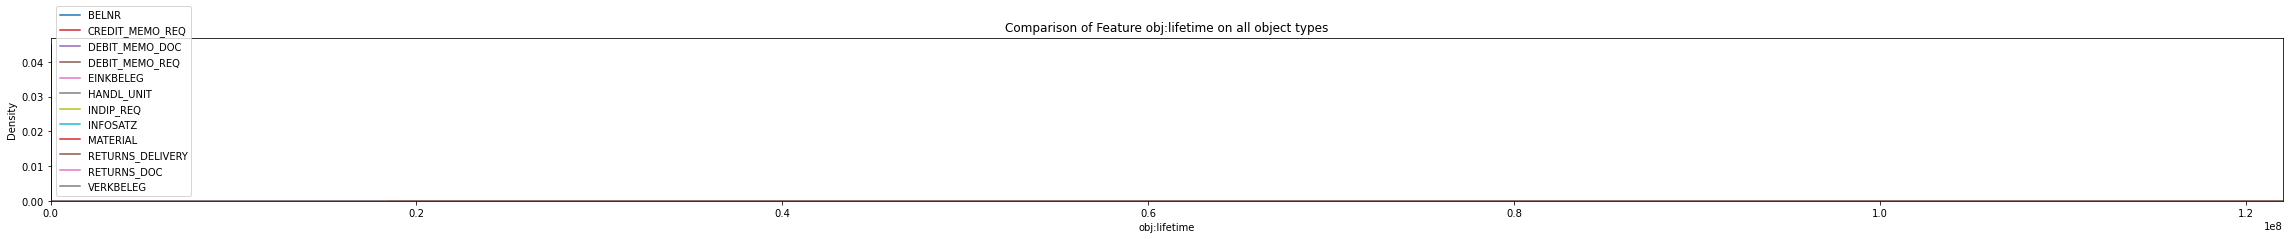

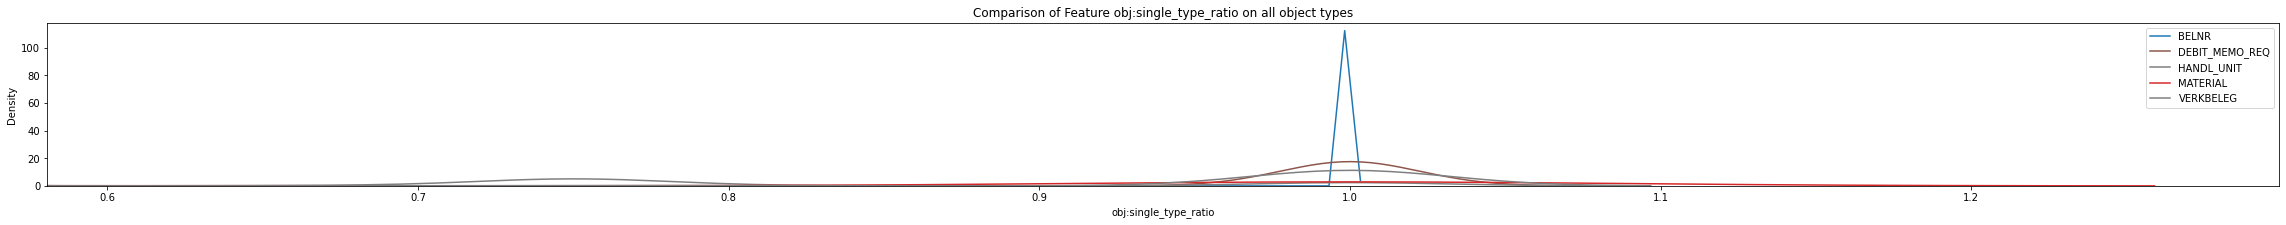

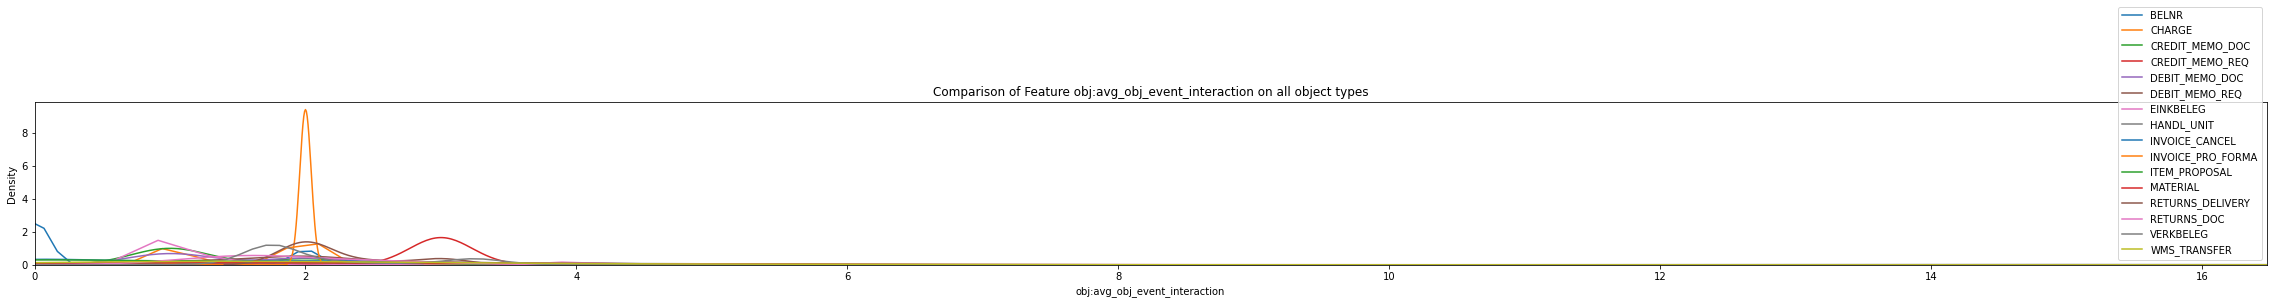

==========================================================DONE


In [157]:
print('Comparing the distributions of the features between object types')

for i, feature in enumerate(df.columns):
    print('==========================================================')
    fig, axs = plt.subplots()
    s = []
    for j, index in enumerate(obj_type_index):
        data_x = df.iloc[obj_type_index[index], i].values
        s.extend(data_x)
        sns.kdeplot(data_x, label=index, warn_singular=False)#, bw_adjust=0.5)
    plt.title(f'Comparison of Feature {feature} on all object types')
    plt.xlabel(f'{feature}')
    s = pd.Series(data=s)
    bot = max(s.mean() - (2*s.std()), 0)
    top = s.mean() + (2*s.std())
    plt.legend()
    plt.xlim((bot, top))
    plt.show()
    
print('==========================================================DONE')

**Features pairwise comparisons**

Pairwise comparisons between the features and their object types


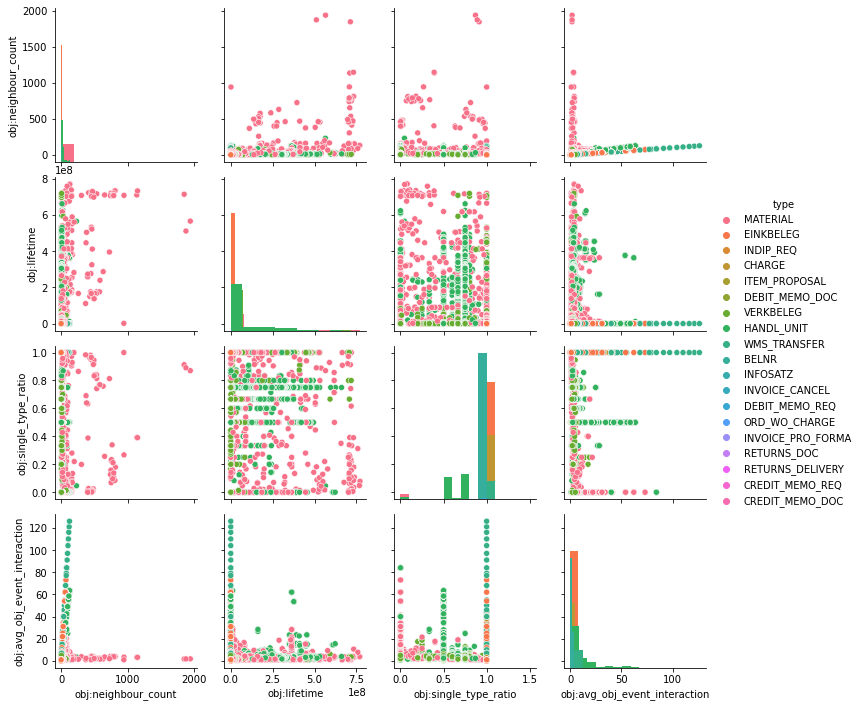

Check for linear relationships between the features (global dataset taken into account)
Read indexes from top left being [0,0]
col: 0, row: 1 --> r-value: 0.277
col: 0, row: 2 --> r-value: -0.426
col: 0, row: 3 --> r-value: 0.54
col: 1, row: 2 --> r-value: -0.293
col: 1, row: 3 --> r-value: 0.071
col: 2, row: 3 --> r-value: -0.601


In [158]:
print('Pairwise comparisons between the features and their object types')
# get combinations for later r calculation
import itertools
combinations = list(itertools.combinations(range(len(df.columns)), 2))
                    
# add a type column for colouring
type_col = [TARGET_LOG['ocel:objects'][obj]['ocel:type'] for obj in row_ids]
df['type'] = type_col

g = sns.PairGrid(df, hue='type')
g.map_diag(plt.hist)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()


print('Check for linear relationships between the features (global dataset taken into account)')
# print r values
print('Read indexes from top left being [0,0]')
for i, j in combinations:
    r, _ = stats.pearsonr(df.iloc[:, i], df.iloc[:, j])
    print(f'col: {i}, row: {j} --> r-value: {round(r, 3)}')

# cleanup
df = df.drop(columns=['type'])
